In [8]:
import flapjack
from flapjack import registry as reg
from flapjack import analysis as analysis
from flapjack import tables as tables
import matplotlib.pyplot as plt
import pandas as pd
import pandas.io.sql as psql
import numpy as np
import scipy
from scipy.optimize import curve_fit
from matplotlib import colors

In [9]:
registry = reg.Registry(database_name='data', username='maca', password='macata125')

In [16]:
qall = registry.queryAll()
qexp= qall.filter((tables.samples.experiment_id==5)|(tables.samples.experiment_id==6)|(tables.samples.experiment_id==7)|(tables.samples.experiment_id==8)|(tables.samples.experiment_id==9)|(tables.samples.experiment_id==10)|(tables.samples.experiment_id==11)|(tables.samples.experiment_id==12)|(tables.samples.experiment_id==13)|(tables.samples.experiment_id==14)|(tables.samples.experiment_id==15)|(tables.samples.experiment_id==16))

qrfp = qexp.filter(tables.measurements.name=='RFP-YFP:585/10,620/15')
qrglu = qrfp.filter(tables.samples.media=='M9-glucosa')
qrgli = qrfp.filter(tables.samples.media=='M9-glicerol')
qcfp = qexp.filter(tables.measurements.name=='CFP:420/50,485/20')
qcglu = qcfp.filter(tables.samples.media=='M9-glucosa')
qcgli = qcfp.filter(tables.samples.media=='M9-glicerol')
qyfp = qexp.filter(tables.measurements.name=='RFP-YFP:500/27,540/25')
qyglu = qyfp.filter(tables.samples.media=='M9-glucosa')
qygli = qyfp.filter(tables.samples.media=='M9-glicerol')
qod = qexp.filter(tables.measurements.name=='OD600:600')
qoglu = qod.filter(tables.samples.media=='M9-glucosa')
qogli = qod.filter(tables.samples.media=='M9-glicerol')

dfexp=psql.read_sql_query(qexp.selectable, registry.engine)
dfexp.head()


,supplements_concentration,inducers_name,measurements_id,measurements_name,measurements_value,measurements_time,measurements_sample_id,samples_id,samples_experiment_id,samples_row,samples_col,samples_media,plasmids_id,plasmids_name,cells_strain,experiments_id,experiments_name,experiments_machine
0,0.0,Layout,111747,OD600:600,0.083,0.194444,387,387,5,1,3,M9-glucosa,4,std:RFP/std:YFP/std:CFP,Top10,5,Cinetica 1 rep 1 base de datos,Synergy HTX15070916
1,0.0,Layout,111748,OD600:600,0.082,0.194444,388,388,5,1,4,M9-glucosa,4,std:RFP/std:YFP/std:CFP,Top10,5,Cinetica 1 rep 1 base de datos,Synergy HTX15070916
2,0.0,Layout,111749,OD600:600,0.082,0.194444,389,389,5,1,5,M9-glucosa,4,std:RFP/std:YFP/std:CFP,Top10,5,Cinetica 1 rep 1 base de datos,Synergy HTX15070916
3,0.0,Layout,111750,OD600:600,0.082,0.194444,390,390,5,1,6,M9-glucosa,4,std:RFP/std:YFP/std:CFP,Top10,5,Cinetica 1 rep 1 base de datos,Synergy HTX15070916
4,0.0,Layout,111751,OD600:600,0.083,0.194444,391,391,5,1,7,M9-glucosa,4,std:RFP/std:YFP/std:CFP,Top10,5,Cinetica 1 rep 1 base de datos,Synergy HTX15070916


In [17]:
rfpglu=psql.read_sql_query(qrglu.selectable, registry.engine)
rfpglu.head()
rfpgli=psql.read_sql_query(qrgli.selectable, registry.engine)
rfpgli.head()

,supplements_concentration,inducers_name,measurements_id,measurements_name,measurements_value,measurements_time,measurements_sample_id,samples_id,samples_experiment_id,samples_row,samples_col,samples_media,plasmids_id,plasmids_name,cells_strain,experiments_id,experiments_name,experiments_machine
0,0.0,Layout,130419,"RFP-YFP:585/10,620/15",11569.0,0.206389,435,435,5,5,3,M9-glicerol,4,std:RFP/std:YFP/std:CFP,Top10,5,Cinetica 1 rep 1 base de datos,Synergy HTX15070916
1,0.0,Layout,130420,"RFP-YFP:585/10,620/15",12048.0,0.206389,436,436,5,5,4,M9-glicerol,4,std:RFP/std:YFP/std:CFP,Top10,5,Cinetica 1 rep 1 base de datos,Synergy HTX15070916
2,0.0,Layout,130421,"RFP-YFP:585/10,620/15",11725.0,0.206389,437,437,5,5,5,M9-glicerol,4,std:RFP/std:YFP/std:CFP,Top10,5,Cinetica 1 rep 1 base de datos,Synergy HTX15070916
3,0.0,Layout,130422,"RFP-YFP:585/10,620/15",11693.0,0.206389,438,438,5,5,6,M9-glicerol,4,std:RFP/std:YFP/std:CFP,Top10,5,Cinetica 1 rep 1 base de datos,Synergy HTX15070916
4,0.0,Layout,130423,"RFP-YFP:585/10,620/15",11873.0,0.206389,439,439,5,5,7,M9-glicerol,4,std:RFP/std:YFP/std:CFP,Top10,5,Cinetica 1 rep 1 base de datos,Synergy HTX15070916


In [18]:
cfpglu=psql.read_sql_query(qcglu.selectable, registry.engine)
cfpglu.head()
cfpgli=psql.read_sql_query(qcgli.selectable, registry.engine)
cfpgli.head()

,supplements_concentration,inducers_name,measurements_id,measurements_name,measurements_value,measurements_time,measurements_sample_id,samples_id,samples_experiment_id,samples_row,samples_col,samples_media,plasmids_id,plasmids_name,cells_strain,experiments_id,experiments_name,experiments_machine
0,0.0,Layout,121107,"CFP:420/50,485/20",7970.0,0.234444,435,435,5,5,3,M9-glicerol,4,std:RFP/std:YFP/std:CFP,Top10,5,Cinetica 1 rep 1 base de datos,Synergy HTX15070916
1,0.0,Layout,121108,"CFP:420/50,485/20",7885.0,0.234444,436,436,5,5,4,M9-glicerol,4,std:RFP/std:YFP/std:CFP,Top10,5,Cinetica 1 rep 1 base de datos,Synergy HTX15070916
2,0.0,Layout,121109,"CFP:420/50,485/20",7916.0,0.234444,437,437,5,5,5,M9-glicerol,4,std:RFP/std:YFP/std:CFP,Top10,5,Cinetica 1 rep 1 base de datos,Synergy HTX15070916
3,0.0,Layout,121110,"CFP:420/50,485/20",7822.0,0.234444,438,438,5,5,6,M9-glicerol,4,std:RFP/std:YFP/std:CFP,Top10,5,Cinetica 1 rep 1 base de datos,Synergy HTX15070916
4,0.0,Layout,121111,"CFP:420/50,485/20",8019.0,0.234444,439,439,5,5,7,M9-glicerol,4,std:RFP/std:YFP/std:CFP,Top10,5,Cinetica 1 rep 1 base de datos,Synergy HTX15070916


In [19]:
yfpglu=psql.read_sql_query(qyglu.selectable, registry.engine)
yfpglu.head()
yfpgli=psql.read_sql_query(qygli.selectable, registry.engine)
yfpgli.head()

,supplements_concentration,inducers_name,measurements_id,measurements_name,measurements_value,measurements_time,measurements_sample_id,samples_id,samples_experiment_id,samples_row,samples_col,samples_media,plasmids_id,plasmids_name,cells_strain,experiments_id,experiments_name,experiments_machine
0,0.0,Layout,139731,"RFP-YFP:500/27,540/25",4287.0,0.220278,435,435,5,5,3,M9-glicerol,4,std:RFP/std:YFP/std:CFP,Top10,5,Cinetica 1 rep 1 base de datos,Synergy HTX15070916
1,0.0,Layout,139732,"RFP-YFP:500/27,540/25",4295.0,0.220278,436,436,5,5,4,M9-glicerol,4,std:RFP/std:YFP/std:CFP,Top10,5,Cinetica 1 rep 1 base de datos,Synergy HTX15070916
2,0.0,Layout,139733,"RFP-YFP:500/27,540/25",4194.0,0.220278,437,437,5,5,5,M9-glicerol,4,std:RFP/std:YFP/std:CFP,Top10,5,Cinetica 1 rep 1 base de datos,Synergy HTX15070916
3,0.0,Layout,139734,"RFP-YFP:500/27,540/25",4161.0,0.220278,438,438,5,5,6,M9-glicerol,4,std:RFP/std:YFP/std:CFP,Top10,5,Cinetica 1 rep 1 base de datos,Synergy HTX15070916
4,0.0,Layout,139735,"RFP-YFP:500/27,540/25",4224.0,0.220278,439,439,5,5,7,M9-glicerol,4,std:RFP/std:YFP/std:CFP,Top10,5,Cinetica 1 rep 1 base de datos,Synergy HTX15070916


In [20]:
odglu=psql.read_sql_query(qoglu.selectable, registry.engine)
odglu.head()
odgli=psql.read_sql_query(qogli.selectable, registry.engine)
odgli.head()

,supplements_concentration,inducers_name,measurements_id,measurements_name,measurements_value,measurements_time,measurements_sample_id,samples_id,samples_experiment_id,samples_row,samples_col,samples_media,plasmids_id,plasmids_name,cells_strain,experiments_id,experiments_name,experiments_machine
0,0.0,Layout,111795,OD600:600,0.086,0.194444,435,435,5,5,3,M9-glicerol,4,std:RFP/std:YFP/std:CFP,Top10,5,Cinetica 1 rep 1 base de datos,Synergy HTX15070916
1,0.0,Layout,111796,OD600:600,0.083,0.194444,436,436,5,5,4,M9-glicerol,4,std:RFP/std:YFP/std:CFP,Top10,5,Cinetica 1 rep 1 base de datos,Synergy HTX15070916
2,0.0,Layout,111797,OD600:600,0.082,0.194444,437,437,5,5,5,M9-glicerol,4,std:RFP/std:YFP/std:CFP,Top10,5,Cinetica 1 rep 1 base de datos,Synergy HTX15070916
3,0.0,Layout,111798,OD600:600,0.082,0.194444,438,438,5,5,6,M9-glicerol,4,std:RFP/std:YFP/std:CFP,Top10,5,Cinetica 1 rep 1 base de datos,Synergy HTX15070916
4,0.0,Layout,111799,OD600:600,0.082,0.194444,439,439,5,5,7,M9-glicerol,4,std:RFP/std:YFP/std:CFP,Top10,5,Cinetica 1 rep 1 base de datos,Synergy HTX15070916


In [25]:
#glucosa
r1=rfpglu['measurements_value'].values
c1=cfpglu['measurements_value'].values
y1=yfpglu['measurements_value'].values
o1=odglu['measurements_value'].values


In [32]:
dr1=np.diff(r1)
dc1=np.diff(c1)
dy1=np.diff(y1)
do1=np.diff(o1)

In [28]:
#glicerol
r2=rfpgli['measurements_value'].values
c2=cfpgli['measurements_value'].values
y2=yfpgli['measurements_value'].values
o2=odgli['measurements_value'].values

In [33]:
dr2=np.diff(r2)
dc2=np.diff(c2)
dy2=np.diff(y2)
do2=np.diff(o2)

In [14]:
pnames = dfexp['plasmids_name'].unique()
mnames = dfexp['measurements_name'].unique()
mednames = dfexp['samples_media'].unique()

print pnames
print mnames
print mednames

[u'std:RFP/std:YFP/std:CFP' u'pLux76:RFP/std:YFP/std:CFP'
 u'pLux76:RFP/pTet:YFP/std:CFP' u'pLux76:RFP/pLacI:YFP/std:CFP'
 u'pTet:RFP/std:YFP/std:CFP' u'pTet:RFP/J23107:YFP/std:CFP'
 u'pTet:RFP/pLacI:YFP/std:CFP' u'pTet:RFP/pLas81:YFP/std:CFP'
 u'pLux76:RFP/J23107:YFP/std:CFP' u'pLux76:RFP/pLas81:YFP/std:CFP'
 u'J23106:RFP/std:YFP/std:CFP' u'J23106:RFP/J23107:YFP/std:CFP'
 u'J23106:RFP/pLacI:YFP/std:CFP' u'J23106:RFP/pLas81:YFP/std:CFP']
[u'OD600:600' u'CFP:420/50,485/20' u'RFP-YFP:585/10,620/15'
 u'RFP-YFP:500/27,540/25']
[u'M9-glucosa' u'M9-glicerol']


In [30]:
import numpy as np

nb = 84

def entropy(density):
    nzs = np.where(density>0)
    return -np.sum(density[nzs]*np.log2(density[nzs].ravel()))

def joint_entropy(density2d):
    nzs = np.where(density2d>0)
    return -np.sum(density2d[nzs].ravel()*np.log2(density2d[nzs].ravel()))
    
def conditional_entropy(density2d):
    # conditional on the first variable (X), i.e. H(Y|X)
    density = np.sum(density2d, axis=1)
    ex = entropy(density)
    je = joint_entropy(density2d)
    # H(Y|X) = H(X,Y) - H(X)
    return je-ex

def mutual_information(density2d):
    # H(Y)
    density = np.sum(density2d, axis=0)
    # I(X,Y) = H(Y) - H(Y|X)
    return entropy(density)-conditional_entropy(density2d)

def prob_density(x, nbins=nb):
    H, edges = np.histogram(x.ravel(), nbins)
    H = H.astype(np.float32)
    return H/np.sum(H.ravel())

def prob_density2d(x, y, nbins=nb):
    H, xedges, yedges = np.histogram2d(x.ravel(), y.ravel(), [nbins,nbins])
    H = H.astype(np.float32)
    return H/np.sum(H.ravel())

def prob_density3d(x, y, z, nbins=nb):
    H, edges = np.histogramdd([x.ravel(), y.ravel(), z.ravel()], [nbins,nbins,nbins])
    H = H.astype(np.float32)
    return H/np.sum(H.ravel())

def prob_density4d(x, y, z, w, nbins=nb):
    H, edges = np.histogramdd([x.ravel(), y.ravel(), z.ravel(), w.ravel()], [nbins,nbins,nbins,nbins])
    H = H.astype(np.float32)
    return H/np.sum(H.ravel())

In [34]:
print "H(dY) = ", entropy(prob_density(dy1))
print "H(dC) = ", entropy(prob_density(dc1))
print "H(dR) = ", entropy(prob_density(dr1))
print "H(dlogOD) = ", entropy(prob_density(do1))

print "---"
print "H(dY|dlogOD) = ", conditional_entropy(prob_density2d(do1,dy1))
print "H(dC|dlogOD) = ", conditional_entropy(prob_density2d(do1,dc1))
print "H(dR|dlogOD) = ", conditional_entropy(prob_density2d(do1,dr1))
print "H(dY|dC) = ", conditional_entropy(prob_density2d(dc1,dy1))
print "H(dY|dR) = ", conditional_entropy(prob_density2d(dr1,dy1))
print "H(dR|dC) = ", conditional_entropy(prob_density2d(dc1,dr1))
print "H(dR|dY) = ", conditional_entropy(prob_density2d(dy1,dr1))
print "H(dC|dY) = ", conditional_entropy(prob_density2d(dy1,dc1))
print "H(dC|dR) = ", conditional_entropy(prob_density2d(dr1,dc1))


print "---"
print "I(dlogOD,dC) = ", mutual_information(prob_density2d(do1,dc1))
print "I(dlogOD,dY) = ", mutual_information(prob_density2d(do1,dy1))
print "I(dlogOD,dR) = ", mutual_information(prob_density2d(do1,dr1))
print "I(dY,dC) = ", mutual_information(prob_density2d(dc1,dy1))
print "I(dY,dR) = ", mutual_information(prob_density2d(dr1,dy1))
print "I(dR,dC) = ", mutual_information(prob_density2d(dc1,dr1))


print "---"
print "H(dY|dC,dlogOD) = ", conditional_entropy(prob_density3d(dc1,dy1,do1))
print "H(dY|dR,dlogOD) = ", conditional_entropy(prob_density3d(dr1,dy1,do1))
print "H(dY|dC,dR) = ", conditional_entropy(prob_density3d(dc1,dy1,dr1))
print "H(dY|dC,dR,dlogOD) = ", conditional_entropy(prob_density4d(dc1,dy1,dr1,do1))

print "H(dR|dC,dlogOD) = ", conditional_entropy(prob_density3d(dc1,dr1,do1))
print "H(dR|dY,dlogOD) = ", conditional_entropy(prob_density3d(dy1,dr1,do1))
print "H(dR|dC,dY) = ", conditional_entropy(prob_density3d(dc1,dr1,dy1))
print "H(dR|dC,dY,dlogOD) = ", conditional_entropy(prob_density4d(dc1,dr1,dy1,do1))

print "H(dC|dY,dlogOD) = ", conditional_entropy(prob_density3d(dy1,dc1,do1))
print "H(dC|dR,dlogOD) = ", conditional_entropy(prob_density3d(dr1,dc1,do1))
print "H(dC|dY,dR) = ", conditional_entropy(prob_density3d(dy1,dc1,dr1))
print "H(dC|dY,dR,dlogOD) = ", conditional_entropy(prob_density4d(dy1,dc1,dr1,do1))

print "---"
print "H(dY|dC,dR,dlogOD) / H(dY) = ", conditional_entropy(prob_density4d(dc1,dy1,dr1,do1))/entropy(prob_density(dy1))
print "H(dY|dC,dlogOD) / H(dY) = ", conditional_entropy(prob_density3d(dc1,dy1,do1))/entropy(prob_density(dy1))
print "H(dY|dR,dlogOD) / H(dY) = ", conditional_entropy(prob_density3d(dr1,dy1,do1))/entropy(prob_density(dy1))
print "H(dY|dlogOD) / H(dY) = ", conditional_entropy(prob_density2d(do1,dy1))/entropy(prob_density(dy1))

print "H(dR|dC,dY,dlogOD) / H(dR) = ", conditional_entropy(prob_density4d(dc1,dr1,dy1,do1))/entropy(prob_density(dr1))
print "H(dR|dC,dlogOD) / H(dR) = ", conditional_entropy(prob_density3d(dc1,dr1,do1))/entropy(prob_density(dr1))
print "H(dR|dY,dlogOD) / H(dR) = ", conditional_entropy(prob_density3d(dy1,dr1,do1))/entropy(prob_density(dr1))
print "H(dR|dlogOD) / H(dR) = ", conditional_entropy(prob_density2d(do1,dr1))/entropy(prob_density(dr1))

print "H(dC|dR,dY,dlogOD) / H(dC) = ", conditional_entropy(prob_density4d(dr1,dc1,dy1,do1))/entropy(prob_density(dc1))
print "H(dC|dR,dlogOD) / H(dC) = ", conditional_entropy(prob_density3d(dr1,dc1,do1))/entropy(prob_density(dc1))
print "H(dC|dY,dlogOD) / H(dC) = ", conditional_entropy(prob_density3d(dy1,dc1,do1))/entropy(prob_density(dc1))
print "H(dC|dlogOD) / H(dC) = ", conditional_entropy(prob_density2d(do1,dc1))/entropy(prob_density(dc1))


print "H(dY|dC)/ H(dY) = ", conditional_entropy(prob_density2d(dc1,dy1))/entropy(prob_density(dy1))
print "H(dY|dR)/ H(dY) = ", conditional_entropy(prob_density2d(dr1,dy1))/entropy(prob_density(dy1))
print "H(dR|dC)/ H(dR) = ", conditional_entropy(prob_density2d(dc1,dr1))/entropy(prob_density(dr1))
print "H(dR|dY)/ H(dR) = ", conditional_entropy(prob_density2d(dy1,dr1))/entropy(prob_density(dr1))
print "H(dC|dY)/ H(dC) = ", conditional_entropy(prob_density2d(dy1,dc1))/entropy(prob_density(dc1))
print "H(dC|dR)/ H(dC) = ", conditional_entropy(prob_density2d(dr1,dc1))/entropy(prob_density(dc1))


H(dY) =  2.68889
H(dC) =  2.70109
H(dR) =  2.20697
H(dlogOD) =  3.69441
---
H(dY|dlogOD) =  2.25317
H(dC|dlogOD) =  2.14398
H(dR|dlogOD) =  1.83284
H(dY|dC) =  2.03337
H(dY|dR) =  1.98474
H(dR|dC) =  1.52066
H(dR|dY) =  1.50282
H(dC|dY) =  2.04557
H(dC|dR) =  2.01478
---
I(dlogOD,dC) =  0.557109
I(dlogOD,dY) =  0.435722
I(dlogOD,dR) =  0.374132
I(dY,dC) =  0.655519
I(dY,dR) =  0.704148
I(dR,dC) =  0.686308
---
H(dY|dC,dlogOD) =  1.58626
H(dY|dR,dlogOD) =  1.47046
H(dY|dC,dR) =  1.4758
H(dY|dC,dR,dlogOD) =  1.06188
H(dR|dC,dlogOD) =  1.17375
H(dR|dY,dlogOD) =  1.05013
H(dR|dC,dY) =  0.96309
H(dR|dC,dY,dlogOD) =  0.649368
H(dC|dY,dlogOD) =  1.47707
H(dC|dR,dlogOD) =  1.48489
H(dC|dY,dR) =  1.50584
H(dC|dY,dR,dlogOD) =  1.07631
---
H(dY|dC,dR,dlogOD) / H(dY) =  0.394915
H(dY|dC,dlogOD) / H(dY) =  0.589932
H(dY|dR,dlogOD) / H(dY) =  0.546865
H(dY|dlogOD) / H(dY) =  0.837955
H(dR|dC,dY,dlogOD) / H(dR) =  0.294235
H(dR|dC,dlogOD) / H(dR) =  0.531837
H(dR|dY,dlogOD) / H(dR) =  0.475824
H(dR|d

In [49]:
print "H(dY) = ", entropy(prob_density(dy2))
print "H(dC) = ", entropy(prob_density(dc2))
print "H(dR) = ", entropy(prob_density(dr2))
print "H(dlogOD) = ", entropy(prob_density(do2))

print "---"
print "H(dY|dlogOD) = ", conditional_entropy(prob_density2d(do2,dy2))
print "H(dC|dlogOD) = ", conditional_entropy(prob_density2d(do2,dc2))
print "H(dR|dlogOD) = ", conditional_entropy(prob_density2d(do2,dr2))
print "H(dY|dC) = ", conditional_entropy(prob_density2d(dc2,dy2))
print "H(dY|dR) = ", conditional_entropy(prob_density2d(dr2,dy2))
print "H(dR|dC) = ", conditional_entropy(prob_density2d(dc2,dr2))
print "H(dR|dY) = ", conditional_entropy(prob_density2d(dy2,dr2))
print "H(dC|dY) = ", conditional_entropy(prob_density2d(dy2,dc2))
print "H(dC|dR) = ", conditional_entropy(prob_density2d(dr2,dc2))


print "---"
print "I(dlogOD,dC) = ", mutual_information(prob_density2d(do2,dc2))
print "I(dlogOD,dY) = ", mutual_information(prob_density2d(do2,dy2))
print "I(dlogOD,dR) = ", mutual_information(prob_density2d(do2,dr2))
print "I(dY,dC) = ", mutual_information(prob_density2d(dc2,dy2))
print "I(dY,dR) = ", mutual_information(prob_density2d(dr2,dy2))
print "I(dR,dC) = ", mutual_information(prob_density2d(dc2,dr2))


print "---"
print "H(dY|dC,dlogOD) = ", conditional_entropy(prob_density3d(dc2,dy2,do2))
print "H(dY|dR,dlogOD) = ", conditional_entropy(prob_density3d(dr2,dy2,do2))
print "H(dY|dC,dR) = ", conditional_entropy(prob_density3d(dc2,dy2,dr2))
print "H(dY|dC,dR,dlogOD) = ", conditional_entropy(prob_density4d(dc2,dy2,dr2,do2))

print "H(dR|dC,dlogOD) = ", conditional_entropy(prob_density3d(dc2,dr2,do2))
print "H(dR|dY,dlogOD) = ", conditional_entropy(prob_density3d(dy2,dr2,do2))
print "H(dR|dC,dY) = ", conditional_entropy(prob_density3d(dc2,dr2,dy2))
print "H(dR|dC,dY,dlogOD) = ", conditional_entropy(prob_density4d(dc2,dr2,dy2,do2))

print "H(dC|dY,dlogOD) = ", conditional_entropy(prob_density3d(dy2,dc2,do2))
print "H(dC|dR,dlogOD) = ", conditional_entropy(prob_density3d(dr2,dc2,do2))
print "H(dC|dY,dR) = ", conditional_entropy(prob_density3d(dy2,dc2,dr2))
print "H(dC|dY,dR,dlogOD) = ", conditional_entropy(prob_density4d(dy2,dc2,dr2,do2))

print "---"
print "H(dY|dC,dR,dlogOD) / H(dY) = ", conditional_entropy(prob_density4d(dc2,dy2,dr2,do2))/entropy(prob_density(dy2))
print "H(dY|dC,dlogOD) / H(dY) = ", conditional_entropy(prob_density3d(dc2,dy2,do2))/entropy(prob_density(dy2))
print "H(dY|dR,dlogOD) / H(dY) = ", conditional_entropy(prob_density3d(dr2,dy2,do2))/entropy(prob_density(dy2))
print "H(dY|dlogOD) / H(dY) = ", conditional_entropy(prob_density2d(do2,dy2))/entropy(prob_density(dy2))

print "H(dR|dC,dY,dlogOD) / H(dR) = ", conditional_entropy(prob_density4d(dc2,dr2,dy2,do2))/entropy(prob_density(dr2))
print "H(dR|dC,dlogOD) / H(dR) = ", conditional_entropy(prob_density3d(dc2,dr2,do2))/entropy(prob_density(dr2))
print "H(dR|dY,dlogOD) / H(dR) = ", conditional_entropy(prob_density3d(dy2,dr2,do2))/entropy(prob_density(dr2))
print "H(dR|dlogOD) / H(dR) = ", conditional_entropy(prob_density2d(do2,dr2))/entropy(prob_density(dr2))

print "H(dC|dR,dY,dlogOD) / H(dC) = ", conditional_entropy(prob_density4d(dr2,dc2,dy2,do2))/entropy(prob_density(dc2))
print "H(dC|dR,dlogOD) / H(dC) = ", conditional_entropy(prob_density3d(dr2,dc2,do2))/entropy(prob_density(dc2))
print "H(dC|dY,dlogOD) / H(dC) = ", conditional_entropy(prob_density3d(dy2,dc2,do2))/entropy(prob_density(dc2))
print "H(dC|dlogOD) / H(dC) = ", conditional_entropy(prob_density2d(do2,dc2))/entropy(prob_density(dc2))

print "H(dY|dC)/ H(dY) = ", conditional_entropy(prob_density2d(dc2,dy2))/entropy(prob_density(dy2))
print "H(dY|dR)/ H(dY) = ", conditional_entropy(prob_density2d(dr2,dy2))/entropy(prob_density(dy2))
print "H(dR|dC)/ H(dR) = ", conditional_entropy(prob_density2d(dc2,dr2))/entropy(prob_density(dr2))
print "H(dR|dY)/ H(dR) = ", conditional_entropy(prob_density2d(dy2,dr2))/entropy(prob_density(dr2))
print "H(dC|dY)/ H(dC) = ", conditional_entropy(prob_density2d(dy2,dc2))/entropy(prob_density(dc2))
print "H(dC|dR)/ H(dC) = ", conditional_entropy(prob_density2d(dr2,dc2))/entropy(prob_density(dc2))


H(dY) =  2.77751
H(dC) =  1.82833
H(dR) =  2.15845
H(dlogOD) =  3.34902
---
H(dY|dlogOD) =  2.26022
H(dC|dlogOD) =  1.42813
H(dR|dlogOD) =  1.7401
H(dY|dC) =  2.40978
H(dY|dR) =  2.11955
H(dR|dC) =  1.82476
H(dR|dY) =  1.50048
H(dC|dY) =  1.4606
H(dC|dR) =  1.49463
---
I(dlogOD,dC) =  0.400196
I(dlogOD,dY) =  0.517295
I(dlogOD,dR) =  0.418349
I(dY,dC) =  0.367733
I(dY,dR) =  0.657969
I(dR,dC) =  0.333694
---
H(dY|dC,dlogOD) =  1.89528
H(dY|dR,dlogOD) =  1.56756
H(dY|dC,dR) =  1.77714
H(dY|dC,dR,dlogOD) =  1.25762
H(dR|dC,dlogOD) =  1.44888
H(dR|dY,dlogOD) =  1.04745
H(dR|dC,dY) =  1.19212
H(dR|dC,dY,dlogOD) =  0.811216
H(dC|dY,dlogOD) =  1.06319
H(dC|dR,dlogOD) =  1.13691
H(dC|dY,dR) =  1.15223
H(dC|dY,dR,dlogOD) =  0.826958
---
H(dY|dC,dR,dlogOD) / H(dY) =  0.452785
H(dY|dC,dlogOD) / H(dY) =  0.682364
H(dY|dR,dlogOD) / H(dY) =  0.564376
H(dY|dlogOD) / H(dY) =  0.813756
H(dR|dC,dY,dlogOD) / H(dR) =  0.375833
H(dR|dC,dlogOD) / H(dR) =  0.671257
H(dR|dY,dlogOD) / H(dR) =  0.485277
H(dR|d

In [50]:
#Porcentajes respecto a entropía inicial
hc1=entropy(prob_density(dc1))#H(dC)
ho1=entropy(prob_density(do1))#H(dlogOD)
hyo1=conditional_entropy(prob_density2d(do1,dy1))#H(dY|dlogOD)
hco1=conditional_entropy(prob_density2d(do1,dc1))#H(dC|dlogOD)
hro1=conditional_entropy(prob_density2d(do1,dr1))#H(dR|dlogOD)

hy1=entropy(prob_density(dy1))#H(dY)
hyc1=conditional_entropy(prob_density2d(dc1,dy1))#H(dY|dC)
hyr1=conditional_entropy(prob_density2d(dr1,dy1))#H(dY|dR)
hyco1=conditional_entropy(prob_density3d(dc1,dy1,do1))#H(dY|dC,dlogOD)
hyro1=conditional_entropy(prob_density3d(dr1,dy1,do1))#H(dY|dR,dlogOD)
hycr1= conditional_entropy(prob_density3d(dc1,dy1,dr1))#H(dY|dC,dR) 
hycro1=conditional_entropy(prob_density4d(dc1,dy1,dr1,do1))#H(dY|dC,dR,dlogOD)

hr1=entropy(prob_density(dr1))#H(dR)
hrc1= conditional_entropy(prob_density2d(dc1,dr1))#H(dR|dC)
hry1=conditional_entropy(prob_density2d(dy1,dr1))#H(dR|dY)
hrco1=conditional_entropy(prob_density3d(dc1,dr1,do1))#H(dR|dC,dlogOD)
hryo1=conditional_entropy(prob_density3d(dy1,dr1,do1))#H(dR|dY,dlogOD)
hrcy1= conditional_entropy(prob_density3d(dc1,dr1,dy1))#H(dR|dC,dY)
hrcyo1=conditional_entropy(prob_density4d(dc1,dr1,dy1,do1))#H(dR|dC,dY,dlogOD)

hc1=entropy(prob_density(dc1))#H(dC)
hcy1=conditional_entropy(prob_density2d(dy1,dc1))#H(dC|dY)
hcr1=conditional_entropy(prob_density2d(dr1,dc1))#H(dC|dR)
hcyo1=conditional_entropy(prob_density3d(dy1,dc1,do1))#H(dC|dY,dlogOD)
hcro1=conditional_entropy(prob_density3d(dr1,dc1,do1))#H(dC|dR,dlogOD)
hcyr1=conditional_entropy(prob_density3d(dy1,dc1,dr1))#H(dC|dY,dR)
hcyro1=conditional_entropy(prob_density4d(dy1,dc1,dr1,do1))#H(dC|dY,dR,dlogOD)

soloh1=[hr1,hy1,hc1,ho1]
hod1=[hr1,hro1,hy1,hyo1,hc1,hco1]
soloy1=[hy1,hyc1,hyr1,hyo1,hyco1,hyro1,hycr1,hycro1]
solor1=[hr1,hrc1,hry1,hro1,hrco1,hryo1,hrcy1,hrcyo1]
soloc1=[hc1,hcy1,hcr1,hco1,hcyo1,hcro1,hcyr1,hcyro1]

In [38]:
A1=(hro1/hr1)*100
B1=(hrco1/hr1)*100
C1=(hryo1/hr1)*100
D1=(hrcyo1/hr1)*100
E1=(hyo1/hy1)*100
F1=(hyco1/hy1)*100
G1=(hyro1/hy1)*100
H1=(hycro1/hy1)*100
I1=(hco1/hc1)*100
J1=(hcyo1/hc1)*100
K1=(hcro1/hc1)*100
L1=(hcyro1/hc1)*100

valores1=[hr1,hro1,hrco1,hryo1,hrcyo1,hy1,hyo1,hyco1,hyro1,hycro1,hc1,hco1,hcyo1,hcro1,hcyro1]
porcentajes1=[A1,B1,C1,D1,E1,F1,G1,H1,I1,J1,K1,L1]

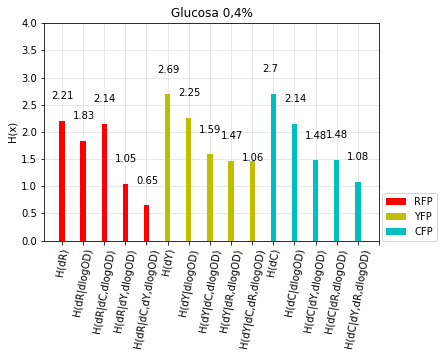

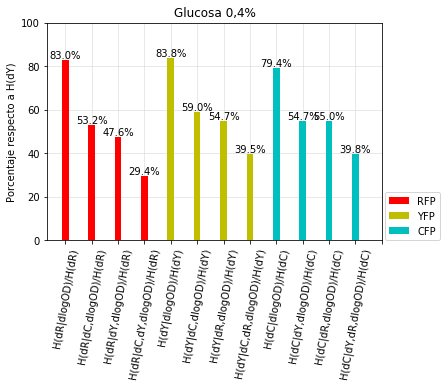

In [103]:
X = np.arange(16)
plt.figure()
plt.title('Glucosa 0,4%')
plt.ylabel('H(x)')
plt.ylim(ymax = 4)
plt.bar(X[0],valores1[0],color='r',width=0.25,label='RFP',zorder=3)
plt.bar(X[1],valores1[1],color='r',width=0.25,zorder=3)
plt.bar(X[2],valores1[2],color='r',width=0.25,zorder=3)
plt.bar(X[3],valores1[3],color='r',width=0.25,zorder=3)
plt.bar(X[4],valores1[4],color='r',width=0.25,zorder=3)
plt.bar(X[5],valores1[5],color='y',width=0.25,label='YFP',zorder=3)
plt.bar(X[6],valores1[6],color='y',width=0.25,zorder=3)
plt.bar(X[7],valores1[7],color='y',width=0.25,zorder=3)
plt.bar(X[8],valores1[8],color='y',width=0.25,zorder=3)
plt.bar(X[9],valores1[8],color='y',width=0.25,zorder=3)
plt.bar(X[10],valores1[10],color='c',width=0.25,label='CFP',zorder=3)
plt.bar(X[11],valores1[11],color='c',width=0.25,zorder=3)
plt.bar(X[12],valores1[12],color='c',width=0.25,zorder=3)
plt.bar(X[13],valores1[13],color='c',width=0.25,zorder=3)
plt.bar(X[14],valores1[14],color='c',width=0.25,zorder=3)
plt.xticks(X, ['H(dR)',"H(dR|dlogOD)",'H(dR|dC,dlogOD)','H(dR|dY,dlogOD)',"H(dR|dC,dY,dlogOD)",'H(dY)',"H(dY|dlogOD)",'H(dY|dC,dlogOD)','H(dY|dR,dlogOD)','H(dY|dC,dR,dlogOD)','H(dC)','H(dC|dlogOD)','H(dC|dY,dlogOD)','H(dC|dR,dlogOD)','H(dC|dY,dR,dlogOD)'],rotation=80)
plt.grid(color='lightgray', linestyle='-', linewidth=0.5,zorder=0)
for a,b in zip(X,valores1):
    plt.text(a-0.5,b+0.4,str(np.round(b,2)),fontsize=10.0, color='k')
plt.legend(loc=(1.01,0.0))
#plt.savefig(fname='hy std-std gli.png',dpi=1200,facecolor='w',edgecolor='w',bbox_inches='tight',pad_inches=0.2)

X = np.arange(13)
plt.figure()
plt.title('Glucosa 0,4%')
plt.ylabel('Porcentaje respecto a H(dY)')
plt.ylim(ymax = 100)
plt.bar(X[0],porcentajes1[0],color='r',width=0.25,label='RFP',zorder=3)
plt.bar(X[1],porcentajes1[1],color='r',width=0.25,zorder=3)
plt.bar(X[2],porcentajes1[2],color='r',width=0.25,zorder=3)
plt.bar(X[3],porcentajes1[3],color='r',width=0.25,zorder=3)
plt.bar(X[4],porcentajes1[4],color='y',width=0.25,label='YFP',zorder=3)
plt.bar(X[5],porcentajes1[5],color='y',width=0.25,zorder=3)
plt.bar(X[6],porcentajes1[6],color='y',width=0.25,zorder=3)
plt.bar(X[7],porcentajes1[7],color='y',width=0.25,zorder=3)
plt.bar(X[8],porcentajes1[8],color='c',width=0.25,label='CFP',zorder=3)
plt.bar(X[9],porcentajes1[9],color='c',width=0.25,zorder=3)
plt.bar(X[10],porcentajes1[10],color='c',width=0.25,zorder=3)
plt.bar(X[11],porcentajes1[11],color='c',width=0.25,zorder=3)
plt.xticks(X, ["H(dR|dlogOD)/H(dR)",'H(dR|dC,dlogOD)/H(dR)','H(dR|dY,dlogOD)/H(dR)',"H(dR|dC,dY,dlogOD)/H(dR)","H(dY|dlogOD)/H(dY)",'H(dY|dC,dlogOD)/H(dY)','H(dY|dR,dlogOD)/H(dY)','H(dY|dC,dR,dlogOD)/H(dY)','H(dC|dlogOD)/H(dC)','H(dC|dY,dlogOD)/H(dC)','H(dC|dR,dlogOD)/H(dC)','H(dC|dY,dR,dlogOD)/H(dC)'],rotation=80)
plt.grid(color='lightgray', linestyle='-', linewidth=0.5,zorder=0)
for a,b in zip(X,porcentajes1):
    plt.text(a-0.60,b+0.6,str(np.round(b,1))+'%',fontsize=10.0, color='k')
plt.legend(loc=(1.01,0.0))
#plt.savefig(fname='porcentajes hy std-std gli.png',dpi=1200,facecolor='w',edgecolor='w',bbox_inches='tight',pad_inches=0.2)


In [51]:
#Porcentajes respecto a entropía inicial
hc2=entropy(prob_density(dc2))#H(dC)
ho2=entropy(prob_density(do2))#H(dlogOD)
hyo2=conditional_entropy(prob_density2d(do2,dy2))#H(dY|dlogOD)
hco2=conditional_entropy(prob_density2d(do2,dc2))#H(dC|dlogOD)
hro2=conditional_entropy(prob_density2d(do2,dr2))#H(dR|dlogOD)

hy2=entropy(prob_density(dy2))#H(dY)
hyc2=conditional_entropy(prob_density2d(dc2,dy2))#H(dY|dC)
hyr2=conditional_entropy(prob_density2d(dr2,dy2))#H(dY|dR)
hyco2=conditional_entropy(prob_density3d(dc2,dy2,do2))#H(dY|dC,dlogOD)
hyro2=conditional_entropy(prob_density3d(dr2,dy2,do2))#H(dY|dR,dlogOD)
hycr2= conditional_entropy(prob_density3d(dc2,dy2,dr2))#H(dY|dC,dR) 
hycro2=conditional_entropy(prob_density4d(dc2,dy2,dr2,do2))#H(dY|dC,dR,dlogOD)

hr2=entropy(prob_density(dr2))#H(dR)
hrc2= conditional_entropy(prob_density2d(dc2,dr2))#H(dR|dC)
hry2=conditional_entropy(prob_density2d(dy2,dr2))#H(dR|dY)
hrco2=conditional_entropy(prob_density3d(dc2,dr2,do2))#H(dR|dC,dlogOD)
hryo2=conditional_entropy(prob_density3d(dy2,dr2,do2))#H(dR|dY,dlogOD)
hrcy2= conditional_entropy(prob_density3d(dc2,dr2,dy2))#H(dR|dC,dY)
hrcyo2=conditional_entropy(prob_density4d(dc2,dr2,dy2,do2))#H(dR|dC,dY,dlogOD)

hc2=entropy(prob_density(dc2))#H(dC)
hcy2=conditional_entropy(prob_density2d(dy2,dc2))#H(dC|dY)
hcr2=conditional_entropy(prob_density2d(dr2,dc2))#H(dC|dR)
hcyo2=conditional_entropy(prob_density3d(dy2,dc2,do2))#H(dC|dY,dlogOD)
hcro2=conditional_entropy(prob_density3d(dr2,dc2,do2))#H(dC|dR,dlogOD)
hcyr2=conditional_entropy(prob_density3d(dy2,dc2,dr2))#H(dC|dY,dR)
hcyro2=conditional_entropy(prob_density4d(dy2,dc2,dr2,do2))#H(dC|dY,dR,dlogOD)


soloh2=[hr2,hy2,hc2,ho2]
hod2=[hr2,hro2,hy2,hyo2,hc2,hco2]
soloy2=[hy2,hyc2,hyr2,hyo2,hyco2,hyro2,hycr2,hycro2]
solor2=[hr2,hrc2,hry2,hro2,hrco2,hryo2,hrcy2,hrcyo2]
soloc2=[hc2,hcy2,hcr2,hco2,hcyo2,hcro2,hcyr2,hycro2]

In [66]:
A2=(hro2/hr2)*100
B2=(hrco2/hr2)*100
C2=(hryo2/hr2)*100
D2=(hrcyo2/hr2)*100
E2=(hyo2/hy2)*100
F2=(hyco2/hy2)*100
G2=(hyro2/hy2)*100
H2=(hycro2/hy2)*100
I2=(hco2/hc2)*100
J2=(hcyo2/hc2)*100
K2=(hcro2/hc2)*100
L2=(hcyro2/hc2)*100

valores2=[hr2,hro2,hco2,hryo2,hrcyo2,hy2,hyo2,hyco2,hyro2,hycro2,hc2,hco2,hcyo2,hcro2,hcyro2]
porcentajes2=[A2,B2,C2,D2,E2,F2,G2,H2,I2,J2,K2,L2]
print valores2
print porcentajes2

[2.1584516, 1.7401025, 1.4281323, 1.0474472, 0.81121635, 2.7775147, 2.2602203, 1.8952765, 1.567564, 1.257618, 1.8283281, 1.4281323, 1.0631881, 1.1369052, 0.82695818]
[80.618095397949219, 67.125684022903442, 48.527714610099792, 37.583255767822266, 81.375634670257568, 68.236416578292847, 56.437647342681885, 45.278534293174744, 78.111380338668823, 58.15083384513855, 62.182778120040894, 45.230293273925781]


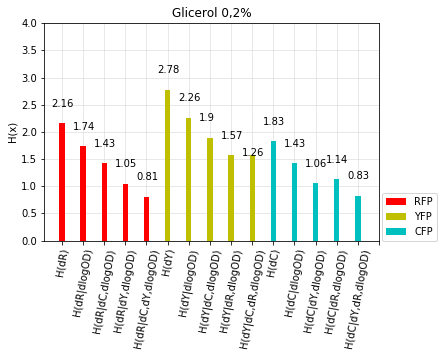

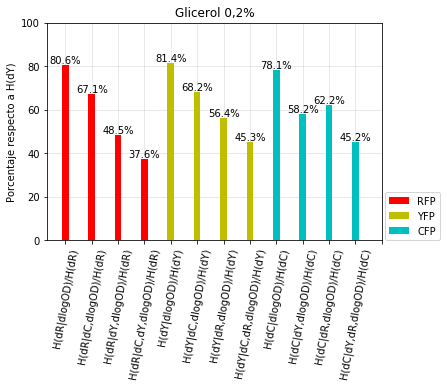

In [72]:
X = np.arange(16)
plt.figure()
plt.title('Glicerol 0,2%')
plt.ylabel('H(x)')
plt.ylim(ymax = 4)
plt.bar(X[0],valores2[0],color='r',width=0.25,label='RFP',zorder=3)
plt.bar(X[1],valores2[1],color='r',width=0.25,zorder=3)
plt.bar(X[2],valores2[2],color='r',width=0.25,zorder=3)
plt.bar(X[3],valores2[3],color='r',width=0.25,zorder=3)
plt.bar(X[4],valores2[4],color='r',width=0.25,zorder=3)
plt.bar(X[5],valores2[5],color='y',width=0.25,label='YFP',zorder=3)
plt.bar(X[6],valores2[6],color='y',width=0.25,zorder=3)
plt.bar(X[7],valores2[7],color='y',width=0.25,zorder=3)
plt.bar(X[8],valores2[8],color='y',width=0.25,zorder=3)
plt.bar(X[9],valores2[8],color='y',width=0.25,zorder=3)
plt.bar(X[10],valores2[10],color='c',width=0.25,label='CFP',zorder=3)
plt.bar(X[11],valores2[11],color='c',width=0.25,zorder=3)
plt.bar(X[12],valores2[12],color='c',width=0.25,zorder=3)
plt.bar(X[13],valores2[13],color='c',width=0.25,zorder=3)
plt.bar(X[14],valores2[14],color='c',width=0.25,zorder=3)
plt.xticks(X, ['H(dR)',"H(dR|dlogOD)",'H(dR|dC,dlogOD)','H(dR|dY,dlogOD)',"H(dR|dC,dY,dlogOD)",'H(dY)',"H(dY|dlogOD)",'H(dY|dC,dlogOD)','H(dY|dR,dlogOD)','H(dY|dC,dR,dlogOD)','H(dC)','H(dC|dlogOD)','H(dC|dY,dlogOD)','H(dC|dR,dlogOD)','H(dC|dY,dR,dlogOD)'],rotation=80)
plt.grid(color='lightgray', linestyle='-', linewidth=0.5,zorder=0)
for a,b in zip(X,valores2):
    plt.text(a-0.5,b+0.3,str(np.round(b,2)),fontsize=10.0, color='k')
plt.legend(loc=(1.01,0.0))
#plt.savefig(fname='hy std-std gli.png',dpi=1200,facecolor='w',edgecolor='w',bbox_inches='tight',pad_inches=0.2)

X = np.arange(13)
plt.figure()
plt.title('Glicerol 0,2%')
plt.ylabel('Porcentaje respecto a H(dY)')
plt.ylim(ymax = 100)
plt.bar(X[0],porcentajes2[0],color='r',width=0.25,label='RFP',zorder=3)
plt.bar(X[1],porcentajes2[1],color='r',width=0.25,zorder=3)
plt.bar(X[2],porcentajes2[2],color='r',width=0.25,zorder=3)
plt.bar(X[3],porcentajes2[3],color='r',width=0.25,zorder=3)
plt.bar(X[4],porcentajes2[4],color='y',width=0.25,label='YFP',zorder=3)
plt.bar(X[5],porcentajes2[5],color='y',width=0.25,zorder=3)
plt.bar(X[6],porcentajes2[6],color='y',width=0.25,zorder=3)
plt.bar(X[7],porcentajes2[7],color='y',width=0.25,zorder=3)
plt.bar(X[8],porcentajes2[8],color='c',width=0.25,label='CFP',zorder=3)
plt.bar(X[9],porcentajes2[9],color='c',width=0.25,zorder=3)
plt.bar(X[10],porcentajes2[10],color='c',width=0.25,zorder=3)
plt.bar(X[11],porcentajes2[11],color='c',width=0.25,zorder=3)
plt.xticks(X, ["H(dR|dlogOD)/H(dR)",'H(dR|dC,dlogOD)/H(dR)','H(dR|dY,dlogOD)/H(dR)',"H(dR|dC,dY,dlogOD)/H(dR)","H(dY|dlogOD)/H(dY)",'H(dY|dC,dlogOD)/H(dY)','H(dY|dR,dlogOD)/H(dY)','H(dY|dC,dR,dlogOD)/H(dY)','H(dC|dlogOD)/H(dC)','H(dC|dY,dlogOD)/H(dC)','H(dC|dR,dlogOD)/H(dC)','H(dC|dY,dR,dlogOD)/H(dC)'],rotation=80)
plt.grid(color='lightgray', linestyle='-', linewidth=0.5,zorder=0)
for a,b in zip(X,porcentajes2):
    plt.text(a-0.60,b+0.6,str(np.round(b,1))+'%',fontsize=10.0, color='k')
plt.legend(loc=(1.01,0.0))
#plt.savefig(fname='porcentajes hy std-std gli.png',dpi=1200,facecolor='w',edgecolor='w',bbox_inches='tight',pad_inches=0.2)


In [95]:
pr1=[A1,B1,C1,D1]
py1=[E1,F1,G1,H1]
pc1=[I1,J1,K1,L1]
pr2=[A2,B2,C2,D2]
py2=[E2,F2,G2,H2]
pc2=[I2,J2,K2,L2]

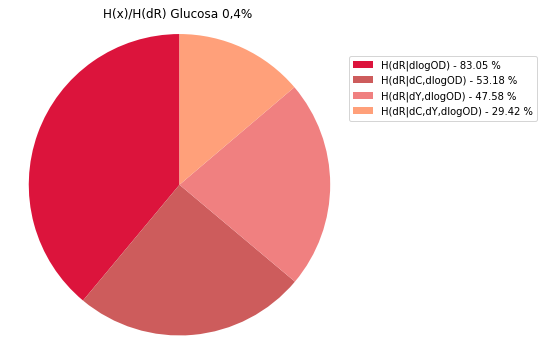

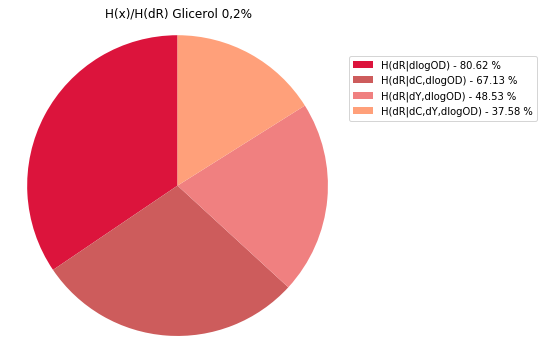

In [96]:
entropr=['H(dR|dlogOD)','H(dR|dC,dlogOD)','H(dR|dY,dlogOD)','H(dR|dC,dY,dlogOD)']
colores=['crimson','indianred','lightcoral','lightsalmon']
factac = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(entropr, pr1)]

plt.figure(figsize=(6,6))
plt.title('H(x)/H(dR) Glucosa 0,4%')
patches, texts = plt.pie(pr1, colors=colores, pctdistance=0.6,labeldistance=1.1,radius=1.,startangle=90)
plt.axis('equal')
plt.legend(patches, factac, loc=(1.01,0.7))
#plt.savefig(filename='entropsr.png',dpi=1200,facecolor='w',edgecolor='w',bbox_inches='tight',pad_inches=0.2)



entropr=['H(dR|dlogOD)','H(dR|dC,dlogOD)','H(dR|dY,dlogOD)','H(dR|dC,dY,dlogOD)']
colores=['crimson','indianred','lightcoral','lightsalmon']
factac = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(entropr, pr2)]

plt.figure(figsize=(6,6))
plt.title('H(x)/H(dR) Glicerol 0,2%')
patches, texts = plt.pie(pr2, colors=colores, pctdistance=0.6,labeldistance=1.1,radius=1.,startangle=90)
plt.axis('equal')
plt.legend(patches, factac, loc=(1.01,0.7))
#plt.savefig(filename='entropsr.png',dpi=1200,facecolor='w',edgecolor='w',bbox_inches='tight',pad_inches=0.2)

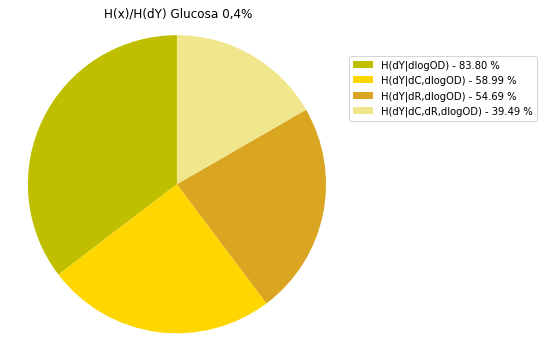

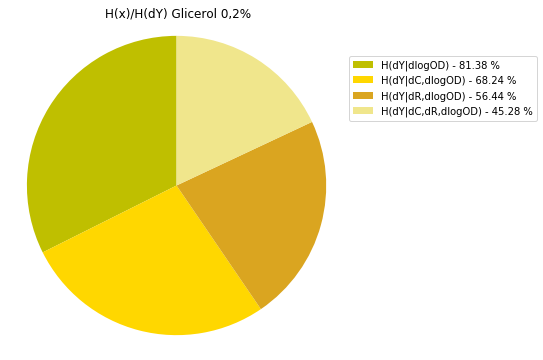

In [98]:
entropy=['H(dY|dlogOD)','H(dY|dC,dlogOD)','H(dY|dR,dlogOD)','H(dY|dC,dR,dlogOD)']
colores=['y','gold','goldenrod','khaki']
factac = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(entropy, py1)]

plt.figure(figsize=(6,6))
plt.title('H(x)/H(dY) Glucosa 0,4%')
patches, texts = plt.pie(py1, colors=colores, pctdistance=0.6,labeldistance=1.1,radius=1.,startangle=90)
plt.axis('equal')
plt.legend(patches, factac, loc=(1.01,0.7))
#plt.savefig(filename='entropsr.png',dpi=1200,facecolor='w',edgecolor='w',bbox_inches='tight',pad_inches=0.2)


entropy=['H(dY|dlogOD)','H(dY|dC,dlogOD)','H(dY|dR,dlogOD)','H(dY|dC,dR,dlogOD)']
colores=['y','gold','goldenrod','khaki']
factac = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(entropy, py2)]

plt.figure(figsize=(6,6))
plt.title('H(x)/H(dY) Glicerol 0,2%')
patches, texts = plt.pie(py2, colors=colores, pctdistance=0.6,labeldistance=1.1,radius=1.,startangle=90)
plt.axis('equal')
plt.legend(patches, factac, loc=(1.01,0.7))
#plt.savefig(filename='entropsr.png',dpi=1200,facecolor='w',edgecolor='w',bbox_inches='tight',pad_inches=0.2)

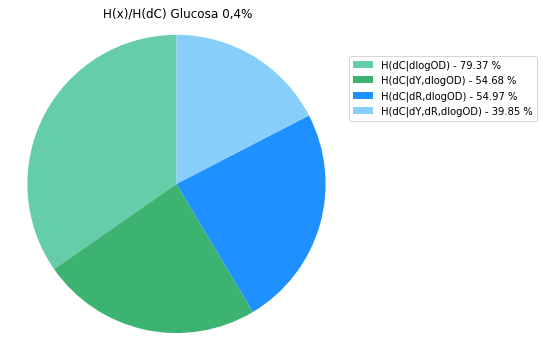

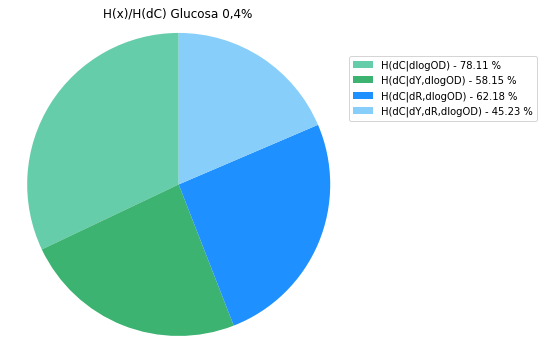

In [99]:
entropc=['H(dC|dlogOD)','H(dC|dY,dlogOD)','H(dC|dR,dlogOD)','H(dC|dY,dR,dlogOD)']
colores=['mediumaquamarine','mediumseagreen','dodgerblue','lightskyblue']
factac = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(entropc, pc1)]

plt.figure(figsize=(6,6))
plt.title('H(x)/H(dC) Glucosa 0,4%')
patches, texts = plt.pie(pc1, colors=colores, pctdistance=0.6,labeldistance=1.1,radius=1.,startangle=90)
plt.axis('equal')
plt.legend(patches, factac, loc=(1.01,0.7))
#plt.savefig(filename='entropsr.png',dpi=1200,facecolor='w',edgecolor='w',bbox_inches='tight',pad_inches=0.2)


entropc=['H(dC|dlogOD)','H(dC|dY,dlogOD)','H(dC|dR,dlogOD)','H(dC|dY,dR,dlogOD)']
colores=['mediumaquamarine','mediumseagreen','dodgerblue','lightskyblue']
factac = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(entropc, pc2)]

plt.figure(figsize=(6,6))
plt.title('H(x)/H(dC) Glucosa 0,4%')
patches, texts = plt.pie(pc2, colors=colores, pctdistance=0.6,labeldistance=1.1,radius=1.,startangle=90)
plt.axis('equal')
plt.legend(patches, factac, loc=(1.01,0.7))
#plt.savefig(filename='entropsr.png',dpi=1200,facecolor='w',edgecolor='w',bbox_inches='tight',pad_inches=0.2)